# Taller de procesamiento digital de imágenes

**Autor:** Jorge Martínez Gómez.

## 1. Python básico

### Definición de variables

In [1]:
x = 3 # Puede ser un número entero, flotante, cadena de caracteres, etc....
print(x)

3


Los caracteres son reconocidos en Python con comillas dobles o simples.

In [2]:
x = 'Hola mundo'
print(x)

x = "Hola mundo"
print(x)

Hola mundo
Hola mundo


### Contenedores

#### Listas

In [3]:
lista = [1, 2, 3]
print(lista[1])
print(lista[2])

2
3


## Definición de funciones

In [4]:
def suma(num_1, num_2):
    resultado = num_1 + num_2

    return resultado

sum_1 = suma(2, 3)
print(sum_1)

5


## 2. Básico de imágenes

### Importando módulos

In [5]:
import cv2
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

%matplotlib inline

### Cargar imágenes

La resolución de la imagen es (350, 550)


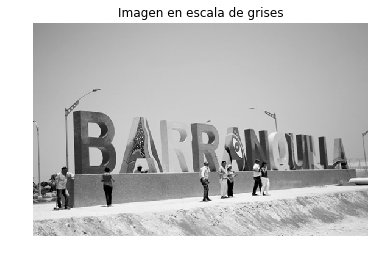

In [6]:
# Cargar una imagen es escala de grises.
img_gris = cv2.imread('images/barranquilla3.jpg', cv2.IMREAD_GRAYSCALE)
print("La resolución de la imagen es {0}".format(img_gris.shape))

# Visualizar una imagen.
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off');

La resolución de la imagen es (600, 600, 3)


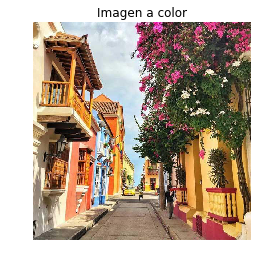

In [7]:
# Cargar una imagen a color.
img_color = cv2.imread('images/cartagena.jpg', cv2.IMREAD_COLOR)
print("La resolución de la imagen es {0}".format(img_color.shape))

# Transformar imagen BGR a RGB.
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Visualizar una imagen.
plt.imshow(img_color)
plt.title('Imagen a color')
plt.axis('off');

## 3. Manipulación de imágenes

### Rotación

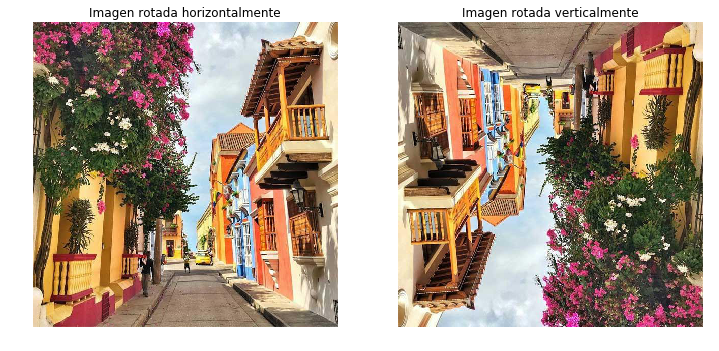

In [8]:
plt.figure(figsize=(12, 12))

# Rotación horizontal.
img_color_flip_horz = cv2.flip(img_color, 1)

plt.subplot(1, 2, 1)
plt.imshow(img_color_flip_horz)
plt.title('Imagen rotada horizontalmente')
plt.axis('off');

# Rotación vertical.
img_color_flip_vert = cv2.flip(img_color, 0)
plt.subplot(1, 2, 2)
plt.imshow(img_color_flip_vert)
plt.title('Imagen rotada verticalmente')
plt.axis('off');

### Negativo de una imagen

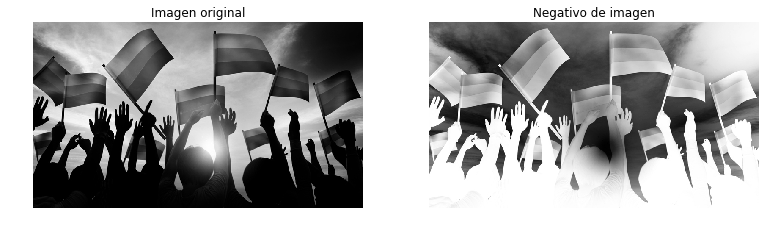

In [9]:
img = cv2.imread('images/flags.jpg', cv2.IMREAD_GRAYSCALE)
img_neg = 255 - img
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(img_neg, cmap='gray')
plt.title('Negativo de imagen')
plt.axis('off');

### Unión entre dos imágenes (blending)

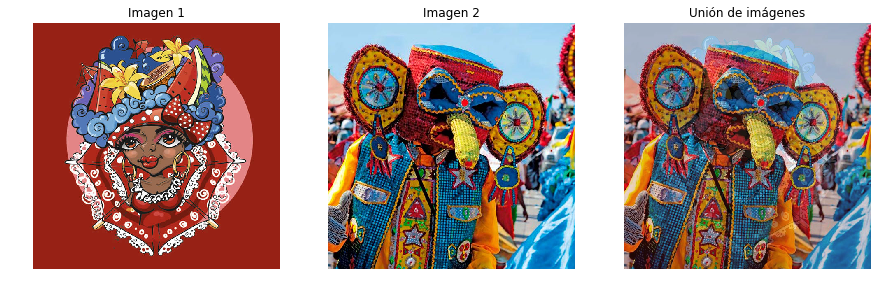

In [10]:
plt.figure(figsize=(15, 15))
img = cv2.imread('images/carnaval_.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1); plt.title('Imagen 1')
plt.imshow(img); plt.axis('off');

img_2 = cv2.imread('images/marimonda.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
# Ajustar resolución entre imágenes.
plt.subplot(1, 3, 2); plt.title('Imagen 2')
plt.imshow(img_2); plt.axis('off');

alpha = 0.2
img_blend = cv2.addWeighted(img, alpha, img_2, 1 - alpha, 0)
plt.subplot(1, 3, 3); plt.title('Unión de imágenes')
plt.imshow(img_blend); plt.axis('off');

## 4. Operaciones orientadas al punto (pixel)

### Función potencia

$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$

In [11]:
def img_power(img, gamma, c):
    norm_img = img / 255
    out_img = c * np.power(norm_img, gamma)

    plt.figure(figsize=(6, 6))
    plt.imshow(out_img, cmap='gray'); plt.axis('off')
    plt.title('Tranformación de potencia');

img = cv2.imread('images/cartagena_2.jpg', cv2.IMREAD_GRAYSCALE)
gamma_slider = widgets.FloatSlider(min=0.1, max=1.0, value=0.5, step=0.1, description='gamma')
interact(img_power, img=fixed(img), gamma=gamma_slider, c=fixed(1));

interactive(children=(FloatSlider(value=0.5, description='gamma', max=1.0, min=0.1), Output()), _dom_classes=('widget-interact',))

### Umbralización de imágenes (segmentación)

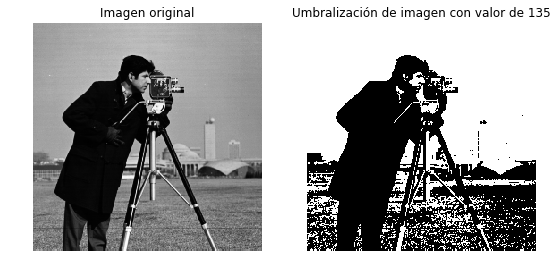

In [12]:
img = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
_, out_img = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off')
plt.title('Imagen original');

plt.subplot(1, 2, 2)
plt.imshow(out_img, cmap='gray'); plt.axis('off')
plt.title('Umbralización de imagen con valor de 135');

In [13]:
def threshold_img(img, th):
    _, out_img = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(4, 4))
    plt.imshow(out_img, cmap='gray'); plt.axis('off')
    plt.title('Umbralización de imagen con valor de {0}'.format(th))


th_slider = widgets.IntSlider(min=0, max=255, value=50, step=1, description='umbral')
interact(threshold_img, img=fixed(img), th=th_slider);

interactive(children=(IntSlider(value=50, description='umbral', max=255), Output()), _dom_classes=('widget-interact',))

### Detección de bordes

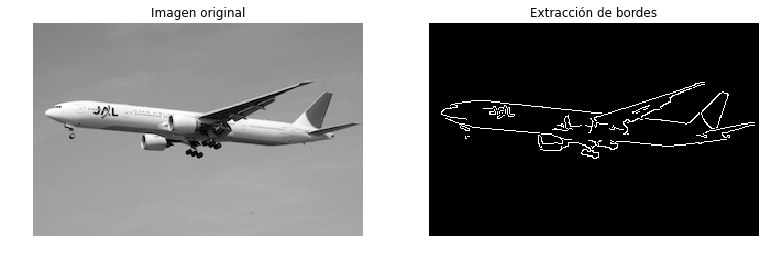

In [141]:
img = cv2.imread('images/airplane.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Imagen original');

img_edges = cv2.Canny(img, 200, 500)
plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap='gray'); plt.axis('off'); plt.title('Extracción de bordes');

### Renderizado fotorrealístico

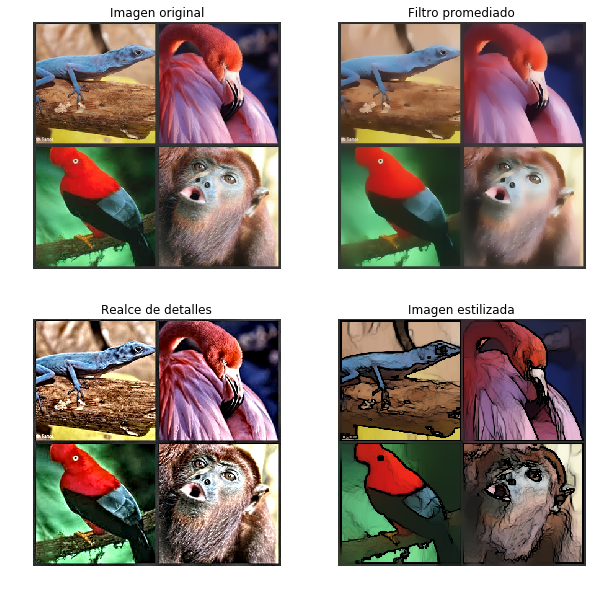

In [84]:
img = cv2.imread('images/animals.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img); plt.title('Imagen original'); plt.axis('off')

img_out = cv2.edgePreservingFilter(img)
plt.subplot(2, 2, 2)
plt.imshow(img_out); plt.title('Filtro promediado'); plt.axis('off');

img_out = cv2.detailEnhance(img);
plt.subplot(2, 2, 3)
plt.imshow(img_out); plt.title('Realce de detalles'); plt.axis('off');

cv2.stylization(img,img_out);
plt.subplot(2, 2, 4)
plt.imshow(img_out); plt.title('Imagen estilizada'); plt.axis('off');


### Efectos en imágenes (seamless cloning)

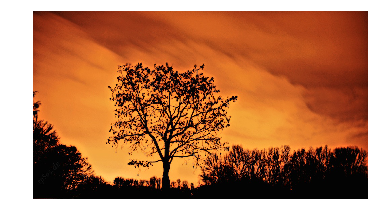

In [53]:
img_dst = cv2.imread('images/sky.jpg')
img_dst = cv2.cvtColor(img_dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_dst); plt.axis('off');

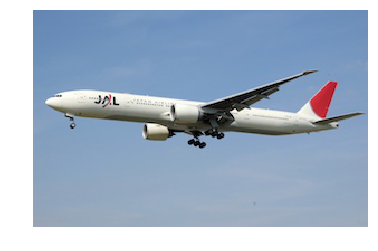

In [54]:
img_src = cv2.imread('images/airplane.jpg')
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img_src); plt.axis('off');

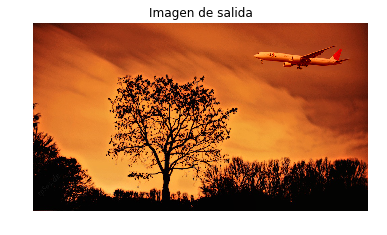

In [142]:
src_mask = np.zeros(img_dst.shape, img_dst.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

center = (800,100)

output = cv2.seamlessClone(img_src, img_dst, src_mask, center, cv2.NORMAL_CLONE)
plt.imshow(output); plt.axis('off'); plt.title('Imagen de salida');

## 5. Operaciones espaciales

### Correlación de imágenes (asociación de plantillas)

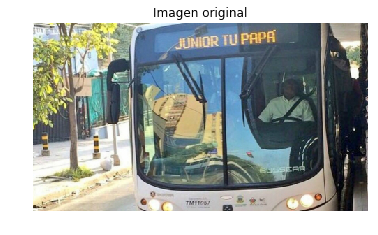

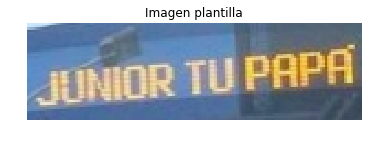

In [14]:
img = cv2.imread('images/transmetro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('images/template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

plt.figure()
plt.axis('off');plt.imshow(img); plt.title('Imagen original');
plt.figure()
plt.axis('off');plt.imshow(template); plt.title('Imagen plantilla');

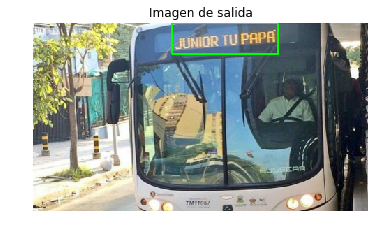

In [15]:
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
_, _, _, top_left = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(img,top_left, bottom_right, (0, 255, 0), 2)

plt.imshow(img); plt.axis('off'); plt.title('Imagen de salida');

#### Para múltiples objetos

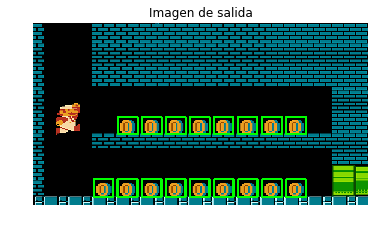

In [16]:
img = cv2.imread('images/mario.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('images/coin.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
locations = np.where(res >= 0.8)
for point in zip(locations[1], locations[0]):
    cv2.rectangle(img, point, (point[0] + width, point[1] + height), (0, 255, 0), 2)

plt.imshow(img); plt.axis('off'); plt.title('Imagen de salida');

## 6. Detección de rostros

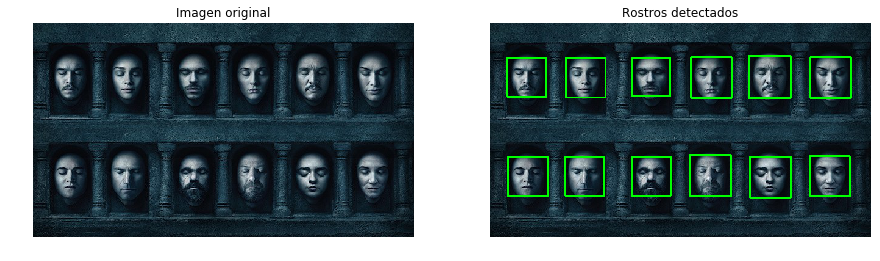

In [17]:
plt.figure(figsize=(15, 15))
img = cv2.imread('images/hall.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original')



classifier_path = 'classifiers/haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(classifier_path)

faces = face_cascade.detectMultiScale(img,
                                      scaleFactor=1.1,
                                      minNeighbors=5,
                                      minSize=(30, 30))
for face_coords in faces:
    x_point, y_point, width, height = face_coords
    cv2.rectangle(img, (x_point, y_point), (x_point + width, y_point + height), (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')
plt.title('Rostros detectados');
